<a href="https://colab.research.google.com/github/akitim/SkillFactory_projects/blob/main/Akimkin_Timofey_%D0%9F%D1%80%D0%BE%D0%B5%D0%BA%D1%82_4_%D0%90%D0%B2%D0%B8%D0%B0%D1%80%D0%B5%D0%B9%D1%81%D1%8B_%D0%B1%D0%B5%D0%B7_%D0%BF%D0%BE%D1%82%D0%B5%D1%80%D1%8C_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Загрузка библиотек

In [106]:
import pandas as pd
from datetime import datetime as dat
#import matplotlib
import matplotlib.pyplot as plt
# import seaborn as sns
import warnings; warnings.filterwarnings('ignore') #(action='once')
# import missingno as msno
# from itertools import combinations
# from scipy.stats import ttest_ind
# from scipy.stats import norm
 
%matplotlib inline
 
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок
pd.options.display.precision = 2
pd.options.display.float_format = '{:.2f}'.format

#Загрузка датасета

In [107]:
path = 'https://raw.githubusercontent.com/akitim/datasets/main/Project_4%20-%20Loseless%20flights.csv'
data = pd.read_csv(path)
        
data.sample(15)

,flight_id,departure_city,arrival_city,scheduled_departure,flight_duration_in_hr,flight_distance,avg_speed,aircraft_model,seats_in_a_plane,seats_sold,gain_per_flight,income_per_flight_eval1,income_per_flight_eval2
56,136479,Анапа,Москва,2017-02-21T10:05:00Z,1.65,1208,732.12,Boeing 737-300,130,122,1738400.00,1586842.00,1581770.00
82,136661,Анапа,Белгород,2017-01-01T09:25:00Z,0.83,636,763.20,Sukhoi Superjet-100,97,96,759000.00,710933.00,693395.00
81,136660,Анапа,Белгород,2017-02-20T09:25:00Z,0.82,636,778.78,Sukhoi Superjet-100,97,87,677100.00,635518.00,615727.00
49,136439,Анапа,Москва,2017-02-25T10:05:00Z,1.67,1208,724.80,Boeing 737-300,130,117,1701800.00,1556453.00,1543588.00
20,136249,Анапа,Москва,2017-02-14T10:05:00Z,1.63,1208,739.59,Boeing 737-300,130,123,1800600.00,1647799.00,1645552.00
30,136293,Анапа,Москва,2017-01-23T10:05:00Z,1.65,1208,732.12,Boeing 737-300,130,114,1689600.00,1541241.00,1525517.00
96,136767,Анапа,Белгород,2017-01-23T09:25:00Z,0.85,636,748.24,Sukhoi Superjet-100,97,83,651300.00,609742.00,584382.00
123,136937,Анапа,Белгород,2017-01-03T09:25:00Z,0.83,636,763.20,Sukhoi Superjet-100,97,81,626100.00,585543.00,560495.00
19,136226,Анапа,Москва,2017-01-30T10:05:00Z,1.67,1208,724.80,Boeing 737-300,130,130,1886000.00,1716819.00,1720260.00
94,136757,Анапа,Белгород,2017-01-27T09:25:00Z,0.82,636,778.78,Sukhoi Superjet-100,97,97,765300.00,716732.00,701007.00


In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   flight_id                127 non-null    int64  
 1   departure_city           127 non-null    object 
 2   arrival_city             127 non-null    object 
 3   scheduled_departure      127 non-null    object 
 4   flight_duration_in_hr    127 non-null    float64
 5   flight_distance          127 non-null    int64  
 6   avg_speed                127 non-null    float64
 7   aircraft_model           127 non-null    object 
 8   seats_in_a_plane         127 non-null    int64  
 9   seats_sold               127 non-null    int64  
 10  gain_per_flight          118 non-null    float64
 11  income_per_flight_eval1  118 non-null    float64
 12  income_per_flight_eval2  118 non-null    float64
dtypes: float64(5), int64(4), object(4)
memory usage: 13.0+ KB


In [109]:
# data[['avg_speed', 'gain_per_flight', 'income_per_flight_eval1', 'income_per_flight_eval2']] =\
#     data[['avg_speed', 'gain_per_flight', 'income_per_flight_eval1', 'income_per_flight_eval2']].\
#         apply(lambda se: se.apply(lambda x: '%.0f' % x), axis=1)

data.drop(['flight_id', 'avg_speed', 'income_per_flight_eval1'], axis=1, inplace=True)

#Распределение купленных мест по модели самолета, выполняющего рейс

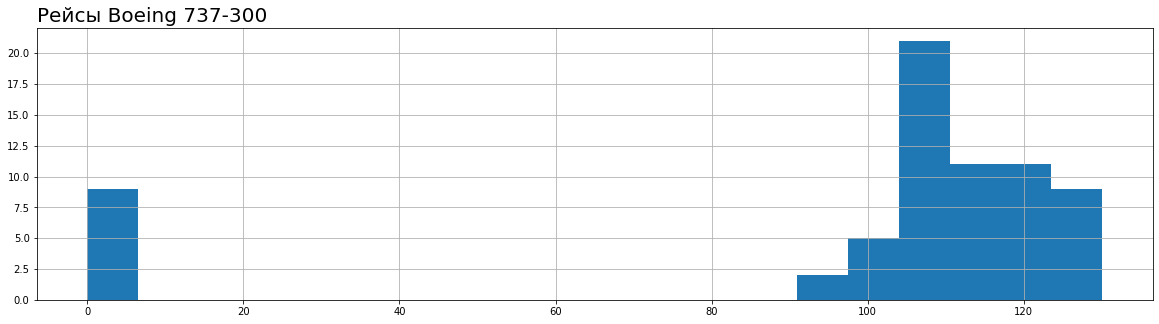

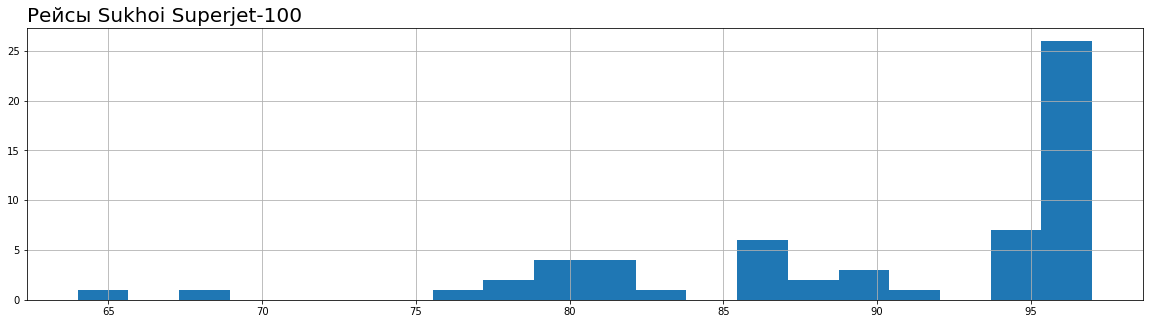

In [140]:
for model in data.aircraft_model.unique():
    plt.figure(figsize = (20, 5))
    data[data.aircraft_model == model].seats_sold.hist(bins=20);
    plt.title(f'Рейсы {model}', fontdict = {'fontsize': 20}, loc='left')
    plt.show()

###Рейсы в Новокузнецк не имеют статус отменненых, однако **данных** по количеству купленных билетов и соответственно по прибыли нет

In [111]:
print('Количество непустых строк по городу прибытия Новокузнецк: ', data[(data.seats_sold != 0) & (data.arrival_city == 'Новокузнецк')].shape[0])

data.fillna(0, inplace=True)

Количество непустых строк по городу прибытия Новокузнецк:  0


In [128]:
data.columns
df1 = pd.DataFrame(data.groupby(by=['arrival_city', 'aircraft_model'])['departure_city'].count())
df1.columns = ['num_of_flights']

df2 = data.groupby(by=['arrival_city', 'aircraft_model']).mean()
df2.rename(columns={'income_per_flight_eval2': 'income_per_flight'}, inplace=True)
df2['income_per_flight_hr'] = df2.income_per_flight / df2.flight_duration_in_hr
pd.concat([df1, df2], axis=1)

,,num_of_flights,flight_duration_in_hr,flight_distance,seats_in_a_plane,seats_sold,gain_per_flight,income_per_flight,income_per_flight_hr
arrival_city,aircraft_model,,,,,,,,
Белгород,Sukhoi Superjet-100,59,0.83,636.00,97.00,90.19,710435.59,646135.15,774050.23
Москва,Boeing 737-300,59,1.66,1208.00,130.00,113.12,1642576.27,1480688.46,889921.42
Новокузнецк,Boeing 737-300,9,5.11,3661.00,130.00,0.00,0.00,0.00,0.00
